## Lauren Thompson


In [71]:
#imports
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [26]:
df = pd.read_csv('crimerates-by-state-2005.csv')
df.head()

,state,murder,forcible_rape,robbery,aggravated_assault,burglary,larceny_theft,motor_vehicle_theft,population
0,United States,5.6,31.7,140.7,291.1,726.7,2286.3,416.7,295753151
1,Alabama,8.2,34.3,141.4,247.8,953.8,2650.0,288.3,4545049
2,Alaska,4.8,81.1,80.9,465.1,622.5,2599.1,391.0,669488
3,Arizona,7.5,33.8,144.4,327.4,948.4,2965.2,924.4,5974834
4,Arkansas,6.7,42.9,91.1,386.8,1084.6,2711.2,262.1,2776221


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   state                52 non-null     object 
 1   murder               52 non-null     float64
 2   forcible_rape        52 non-null     float64
 3   robbery              52 non-null     float64
 4   aggravated_assault   52 non-null     float64
 5   burglary             52 non-null     float64
 6   larceny_theft        52 non-null     float64
 7   motor_vehicle_theft  52 non-null     float64
 8   population           52 non-null     int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 3.8+ KB


In [28]:
df.shape

(52, 9)

In [58]:
# Divisions based on the Census Bureau https://en.wikipedia.org/wiki/List_of_regions_of_the_United_States

north_east=['Connecticut', 'Maine', 'Massachusetts', 'New Hampshire', 'Rhode Island', 'Vermont', 
            'New Jersey', 'New York', 'Pennsylvania']
south = ['Delaware', 'Florida', 'Georgia', 'Maryland', 'North Carolina', 'South Carolina', 'Virginia', 
         'District of Columbia', 'West Virginia', 'Alabama', 'Kentucky', 'Mississippi', 'Tennessee',
        'Arkansas', 'Louisiana', 'Oklahoma', 'Texas']
midwest = ['Illinois', 'Indiana', 'Michigan', 'Ohio', 'Wisconsin', 'Iowa', 'Kansas', 'Minnesota', 'Missouri', 
           'Nebraska', 'North Dakota', 'South Dakota']
west = ['Arizona', 'Colorado', 'Idaho', 'Montana', 'Nevada', 'New Mexico', 'Utah', 'Wyoming', 'Alaska', 'California', 'Hawaii', 'Oregon', 'Washington']

df_states = df.loc[df['state'] != 'United States']
df_states['region'] = np.where(df_states['state'].isin(north_east), 'North East', 
                        np.where(df_states['state'].isin(south), 'South', 
                                 np.where(df_states['state'].isin(west), 'West', 'Mid-West')))

<ipython-input-58-e0b9667f9461>:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [59]:
df_states.head()

,state,murder,forcible_rape,robbery,aggravated_assault,burglary,larceny_theft,motor_vehicle_theft,population,region
1,Alabama,8.2,34.3,141.4,247.8,953.8,2650.0,288.3,4545049,South
2,Alaska,4.8,81.1,80.9,465.1,622.5,2599.1,391.0,669488,West
3,Arizona,7.5,33.8,144.4,327.4,948.4,2965.2,924.4,5974834,West
4,Arkansas,6.7,42.9,91.1,386.8,1084.6,2711.2,262.1,2776221,South
5,California,6.9,26.0,176.1,317.3,693.3,1916.5,712.8,35795255,West


## Scatterplot

In [65]:
fig = px.scatter( df_states, x = df_states['burglary'], y=df_states['murder'],
    color = 'region')
fig.update_layout(
  title="Crime Rates of Burglary and Murder per State", 
  xaxis_title="Burglary", 
  yaxis_title="Murder")
fig.show()

In [66]:
df[df['murder'] >= 35]

,state,murder,forcible_rape,robbery,aggravated_assault,burglary,larceny_theft,motor_vehicle_theft,population,region
9,District of Columbia,35.4,30.2,672.1,721.3,649.7,2694.9,1402.3,582049,South


## Bubble Chart

In [70]:
fig = px.scatter(df_states, x='burglary', y='murder', size='population', color='region')
fig.update_layout(
  title="Crime Rates of Burglary and Murder per State Sized by Population", 
  xaxis_title="Burglary", 
  yaxis_title="Murder")
fig.show()

Density Plot

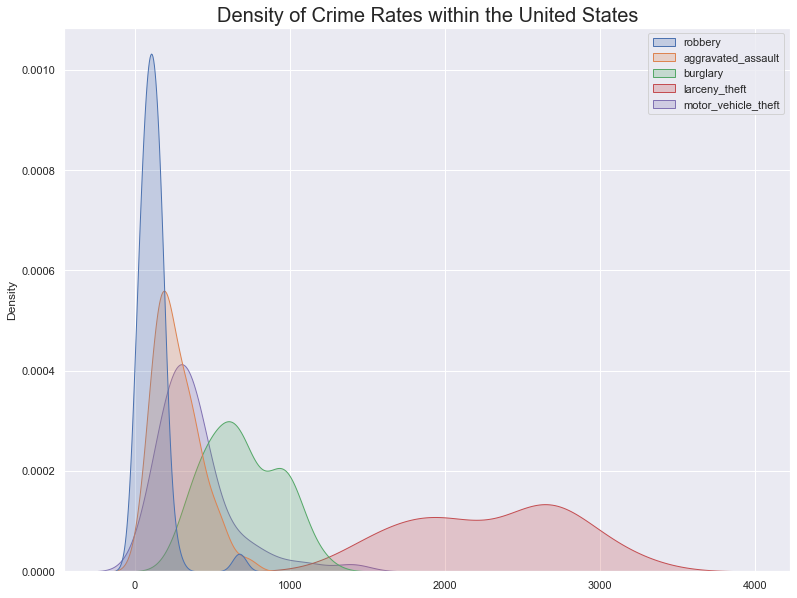

In [110]:
sns.set_theme(style="darkgrid")
fig, ax = plt.subplots(figsize=(13, 10))
sns.kdeplot(data = df_states.drop(columns = ['population', 'murder', 'forcible_rape']), fill=True, ax=ax).set_title('Density of Crime Rates within the United States',fontsize=20)
plt.show()